<a href="https://colab.research.google.com/github/italolima04/data-science/blob/master/COVID_BRASIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
dt = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')

In [4]:
dt 

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-15,BA,NaN,state,807,27,True,14873064.0,29.0,5.42592,0.0335
1,2020-04-15,CE,Acopiara,city,1,0,True,54270.0,2300309.0,1.84264,NaN
2,2020-04-15,CE,Amontada,city,1,0,True,43452.0,2300754.0,2.30139,NaN
3,2020-04-15,CE,Aquiraz,city,30,0,True,80271.0,2301000.0,37.37340,NaN
4,2020-04-15,CE,Aracati,city,3,1,True,74547.0,2301109.0,4.02431,0.3333
...,...,...,...,...,...,...,...,...,...,...,...
14991,2020-02-27,SP,NaN,state,1,0,False,45919049.0,35.0,0.00218,NaN
14992,2020-02-26,SP,São Paulo,city,1,0,False,12252023.0,3550308.0,0.00816,NaN
14993,2020-02-26,SP,NaN,state,1,0,False,45919049.0,35.0,0.00218,NaN
14994,2020-02-25,SP,São Paulo,city,1,0,False,12252023.0,3550308.0,0.00816,NaN


In [5]:
#Função do Python para filtrar features específicas e armazená-los em um novo DataFrame
states = dt.loc[dt.place_type== 'state', :]
#states.drop(columns=['city'])
states.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-15,BA,NaN,state,807,27,True,14873064.0,29.0,5.42592,0.0335
75,2020-04-15,CE,NaN,state,2291,124,True,9132078.0,23.0,25.08739,0.0541
186,2020-04-15,MG,NaN,state,903,30,True,21168791.0,31.0,4.26571,0.0332
273,2020-04-15,PR,NaN,state,816,41,True,11433957.0,41.0,7.13664,0.0502
280,2020-04-14,AC,NaN,state,99,3,True,881935.0,12.0,11.22532,0.0303


In [6]:
#Método para verificar os objetos únicos no DataFrame, nesse caso são os Estados
states.state.unique()

array(['BA', 'CE', 'MG', 'PR', 'AC', 'AL', 'AM', 'AP', 'DF', 'GO', 'MA',
       'MS', 'MT', 'PB', 'PE', 'PI', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO', 'ES', 'PA'], dtype=object)

In [7]:
#Método para verificar a quantidade de objetos únicos, nesse caso o número de estados, que é equivalente ao número de estados do Brasil.
len(states.state.unique())

27

In [0]:
#Método para Desestruturar um DataFrame e selecionar apenas as colunas de interesse, criando um novo DataFrame
data = states[['date', 'state', 'confirmed', 'deaths', 'is_last']]

In [9]:
data.head()

,date,state,confirmed,deaths,is_last
0,2020-04-15,BA,807,27,True
75,2020-04-15,CE,2291,124,True
186,2020-04-15,MG,903,30,True
273,2020-04-15,PR,816,41,True
280,2020-04-14,AC,99,3,True


In [0]:
covid = pd.DataFrame()

In [0]:
#Criaçã ode variáveis locais p/ manipulação futura.
state = "SP"
situation = "confirmed"


In [12]:
#Criação de novo DataFrame correlacionando apenas um estado em específico (Variável Local State)
data_state =  data.loc[data.state == state, :]
data_state.head()

,date,state,confirmed,deaths,is_last
1328,2020-04-14,SP,9371,695,True
2387,2020-04-13,SP,8895,608,False
3407,2020-04-12,SP,8755,588,False
4394,2020-04-11,SP,8419,560,False
5339,2020-04-10,SP,8216,540,False


In [13]:
#Reestruturar DataFrame agrupando as variáveis de Data e o Somatório de Casos Confirmados, mostrando uma evolução ao longo dos dias
data_state = data_state.groupby('date').sum()[situation].reset_index()
data_state

,date,confirmed
0,2020-02-25,1
1,2020-02-26,1
2,2020-02-27,1
3,2020-02-28,2
4,2020-02-29,2
5,2020-03-01,2
6,2020-03-02,2
7,2020-03-03,2
8,2020-03-04,3
9,2020-03-05,6


In [0]:
#Removendo a coluna Date por questão de influência no estudo.
data_state = data_state.drop(columns=['date'])


In [15]:
#Renomeando a coluna no DataFrame, exibindo o Estado correspondente
data_state.columns = [state]
data_state

,SP
0,1
1,1
2,1
3,2
4,2
5,2
6,2
7,2
8,3
9,6


In [16]:
#Concatenando dois DataFrames
covid = pd.concat([covid, data_state], ignore_index=False, axis=1)
covid

,SP
0,1
1,1
2,1
3,2
4,2
5,2
6,2
7,2
8,3
9,6


In [17]:
#Forma de Resetar o DataFrame #Gambiarra
covid = pd.DataFrame()
covid

""


In [18]:
#Processo Geral p/ Criação do DataFrame com os número de casos por estados e os dias respectivos:

#Defino o Estado e Tipo de Caso
state = "RJ"
situation = "confirmed"
#Manipulo o DataFrame para relacionar somente o estado, com o número acumulado de casos confirmados
data_state =  data.loc[data.state == state, :]
data_state = data_state.groupby('date').sum()[situation].reset_index()
#Retiro a Coluna de Date e renomeio a coluna com a Sigla do Estado
data_state = data_state.drop(columns=['date'])
data_state.columns = [state]
#Faço a concatenação entre o DataFrame covid e o data_state com o estado
covid = pd.concat([covid, data_state], ignore_index=False, axis=1)
covid


,RJ
0,1
1,2
2,3
3,15
4,24
5,25
6,63
7,66
8,119
9,186


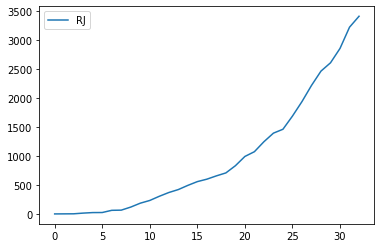

In [19]:
covid.plot()

In [0]:
#Processo Geral p/ Criação do DataFrame com os número de casos por estados e os dias respectivos, função Generalizada:
def since_the_first (data, states, days, situation):

  covid = pd.DataFrame()

  for state in states:
    try:
       data_state =  data.loc[data.state == state, : ]
       data_state = data_state.groupby('date').sum()[situation].reset_index()
       data_state = data_state.drop(columns=['date'])
       data_state.columns = [state]
       covid = pd.concat([covid, data_state], ignore_index=False, axis=1)

    except: 
      print('Is not ' + situation + 'in' + state)

  covid.columns = states

  return covid.head(days)

In [21]:
#Casos Confirmados em comparação nos três estados, SP, RJ E CE
data_state = since_the_first(data, ['SP', 'RJ', 'CE'], 46, 'confirmed')
data_state


,SP,RJ,CE
0,1,1.0,9.0
1,1,2.0,10.0
2,1,3.0,19.0
3,2,15.0,24.0
4,2,24.0,68.0
5,2,25.0,84.0
6,2,63.0,125.0
7,2,66.0,164.0
8,3,119.0,185.0
9,6,186.0,211.0


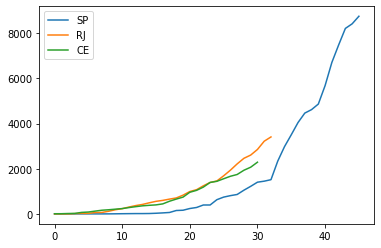

In [22]:
#Método p/ gerar Gráfico linear
data_state.plot()

In [23]:
#Mortes em comparação nos três estados, SP, RJ E CE
data_state = since_the_first(data, ['SP', 'RJ', 'CE'], 46, 'deaths')
data_state

,SP,RJ,CE
0,0,0.0,0.0
1,0,0.0,0.0
2,0,0.0,0.0
3,0,0.0,0.0
4,0,0.0,0.0
5,0,0.0,0.0
6,0,0.0,0.0
7,0,2.0,0.0
8,0,3.0,0.0
9,0,3.0,0.0


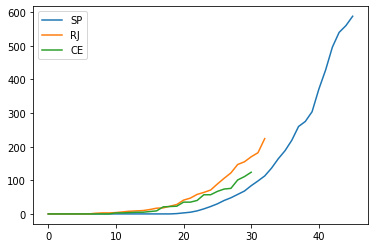

In [24]:
data_state.plot()

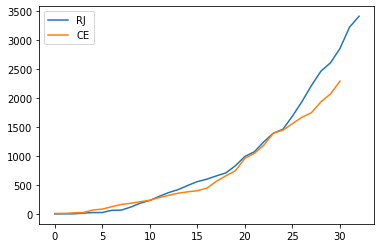

In [25]:
data_state = since_the_first(data, ['RJ', 'CE'], 46, 'confirmed')
data_state.plot()

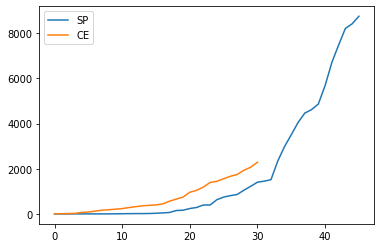

In [26]:
data_state = since_the_first(data, ['SP', 'CE'], 46, 'confirmed')
data_state.plot()

In [35]:
df_correlation = pd.DataFrame()

""


In [0]:
#Correlação entre Casos e Mortes utilizando Coeficiente de Correlação de Pearson
sp_confirmed = since_the_first(data, ['SP'], 100, 'confirmed')
sp_deaths = since_the_first(data, ['SP'], 100, 'deaths')


In [0]:
df_correlation  = pd.concat([df_correlation, sp_confirmed, sp_deaths], ignore_index=True, axis=1)

In [43]:
df_correlation.columns = ['Cases', 'Deeaths']
df_correlation

,Cases,Deeaths
0,1,0
1,1,0
2,1,0
3,2,0
4,2,0
5,2,0
6,2,0
7,2,0
8,3,0
9,6,0


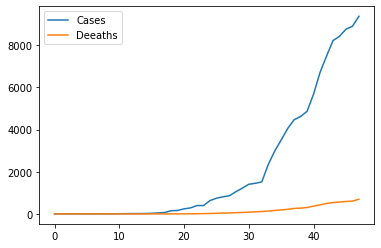

In [44]:
df_correlation.plot()

In [45]:
#Método de Pearson para identificar a correlação entre as duas variáveis.
#Se as duas possuem o mesmo tipo de comportamento (ex: uma sobe e a outra sobe, ou uma sobe e a outra desce = correlação positiva)
#Se as duas possuem o diferentes tipos de comportamento (ex: uma sobe e a outra desce, ou uma desce e a outra sobe = correlação negativa)
df_correlation.corr(method="pearson")

,Cases,Deeaths
Cases,1.000000,0.996212
Deeaths,0.996212,1.000000


In [48]:
#Intalando a biblioteca scipy
pip install scipy

In [63]:
#Pegando somente os valores da Coluna de casos e repassando para uma lista
confirmed = sp_confirmed['SP'].values
confirmed

array([   1,    1,    1,    2,    2,    2,    2,    2,    3,    6,   10,
         13,   16,   16,   19,   30,   46,   65,  152,  164,  240,  286,
        396,  396,  631,  745,  810,  862, 1052, 1223, 1406, 1451, 1517,
       2339, 2981, 3506, 4048, 4466, 4620, 4866, 5682, 6708, 7480, 8216,
       8419, 8755, 8895, 9371])

In [64]:
#Pegando somente os valores da Coluna de mortes e repassando para uma lista
deaths = sp_deaths['SP'].values
deaths

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   3,   5,   9,  15,  22,  30,
        40,  48,  58,  68,  84,  98, 113, 136, 164, 188, 219, 260, 275,
       304, 371, 428, 496, 540, 560, 588, 608, 695])

In [65]:
#Importando o módulo stats da biblioteca scipy
from scipy import stats 
stats.pearsonr(confirmed, deaths)


(0.9962117086528011, 1.8998958790270853e-50)

In [0]:
#Determinar se o coeficiente de correlação é significativo:
#Geralmente utiliza-se 0.05 de significância, o que significa que a probabilidade de ser estimado que uma correlação existe quando ela não existe é de 5% (Falso Positivo)
# Se o p <= a: Correlação estatisticamente significativa
# Se o p > a: Correlação não é estatisticamente significativa 
#Com 0.05 de significância, as duas variáveis (cases, deaths) possuem correlação estatisticamente significativa

In [0]:
df_correlation_ce = pd.DataFrame()

In [0]:
#Correlação entre Casos e Mortes utilizando Coeficiente de Correlação de Pearson
ce_confirmed = since_the_first(data, ['CE'], 100, 'confirmed')
ce_deaths = since_the_first(data, ['CE'], 100, 'deaths')


In [0]:
df_correlation_ce  = pd.concat([df_correlation_ce, ce_confirmed, ce_deaths], ignore_index=True, axis=1)

In [69]:
df_correlation_ce.columns = ['Cases', 'Deeaths']
df_correlation_ce

,Cases,Deeaths
0,9,0
1,10,0
2,19,0
3,24,0
4,68,0
5,84,0
6,125,0
7,164,0
8,185,0
9,211,0


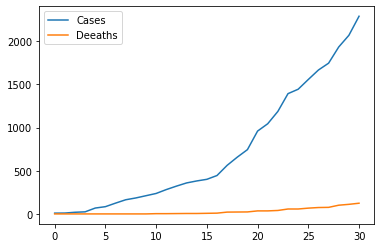

In [70]:
df_correlation_ce.plot()

In [71]:
df_correlation_ce.corr(method="pearson")

,Cases,Deeaths
Cases,1.00000,0.98225
Deeaths,0.98225,1.00000


In [77]:
confirmed_ce = ce_confirmed['CE'].values
confirmed

array([   1,    1,    1,    2,    2,    2,    2,    2,    3,    6,   10,
         13,   16,   16,   19,   30,   46,   65,  152,  164,  240,  286,
        396,  396,  631,  745,  810,  862, 1052, 1223, 1406, 1451, 1517,
       2339, 2981, 3506, 4048, 4466, 4620, 4866, 5682, 6708, 7480, 8216,
       8419, 8755, 8895, 9371])

In [74]:
deaths_ce = ce_deaths['CE'].valuesstats.pearsonr(confirmed, deaths)

deaths_ce

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   3,   4,
         5,   5,   7,   9,  21,  22,  23,  35,  35,  40,  57,  57,  67,
        74,  76, 101, 111, 124])

In [79]:
#Método que retorna o coeficiente de correlação de Pearson e o p-Value
stats.pearsonr(confirmed_ce, deaths_ce)

(0.9822504993933152, 1.2481417398119093e-22)

In [0]:
#Com 0.05 de significância, as duas variáveis (cases, deaths) possuem correlação estatisticamente significativa

In [81]:
#Método de Correlação de Spearman Relação monotônica entre as variáveis 
stats.spearmanr(confirmed_ce, deaths_ce)

SpearmanrResult(correlation=0.9828160658815253, pvalue=7.832594901406941e-23)